# Chapter 5

In [1]:
import sympy as sp
from sympy import symbols, sqrt, init_printing
from sympy_equation import Eqn, solve, table_of_expressions
from ambiance import Atmosphere
import numpy as np
import pint
import pygasflow
from pygasflow import *
from pygasflow.atd import *
init_printing()
pygasflow.defaults.solver_to_dict = True

ureg = pint.UnitRegistry()
# use "~P" to format units with unicode
ureg.formatter.default_format = "~"
pygasflow.defaults.pint_ureg = ureg
K = ureg.K
m = ureg.m
km = ureg.km
s = ureg.s
J = ureg.J
W = ureg.W
kg = ureg.kg
deg = ureg.deg
atm = ureg.atm

## P 5.2

In [2]:
ht = 20e06 * J / kg
T_exit = 1000 * K
Cp = 1004 * J/kg/K
R = 287.05 * J / kg / K

### (a)

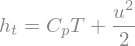

In [3]:
hts, Cps, Ts, us = symbols("h_t, C_p, T, u", positive=True, real=True)
e = Eqn(hts, Cps * Ts + us**2 / 2)
e

Outside the reservoir, in order to achieve the maximum speed it must be $T_{t} = 0$:

In [4]:
u = (e.subs({hts: ht.magnitude, Ts: 0}) * 2).swap.apply(sp.sqrt)
u

In [5]:
u_max = float(u.rhs) * m / s
u_max

<Quantity(6324.55532, 'meter / second')>

### (b)

In [6]:
f = 6 # Lighthill model
gamma = (f + 2) / f
Cp = (f + 2) / 2 * R 

In [7]:
gamma

In [8]:
Cp

<Quantity(1148.2, 'joule / kilogram / kelvin')>

In [9]:
u = solve(e.subs({hts: ht.magnitude, Ts: T_exit.magnitude, Cps: Cp.magnitude}))[0]
u

In [10]:
u = float(u.rhs) * m / s
u

<Quantity(6140.32572, 'meter / second')>

### (c)

If 20% of the entalphy is frozen, then: $h_{t, avail} = 0.8 h_{t}$:

In [11]:
ht_avail = 0.8 * ht
ht_avail

<Quantity(16000000.0, 'joule / kilogram')>

In [12]:
u = solve(e.subs({hts: ht_avail.magnitude, Ts: T_exit.magnitude, Cps: Cp.magnitude}))[0]
u = float(u.rhs) * m / s
u

<Quantity(5450.10092, 'meter / second')>

## P 5.3

In [13]:
v_inf = 2 * km / s
H = 30 * km

### (a)

In [14]:
atmosphere = Atmosphere(H.to("m").magnitude)
T = atmosphere.temperature[0] * K
T

<Quantity(226.509084, 'kelvin')>

In [15]:
gamma = 1.4
R = 287.05 * J / kg / K
a = sound_speed(gamma, R, T).to("m/s")
a

<Quantity(301.707152, 'meter / second')>

In [16]:
M_inf = v_inf.to("m/s") / a
M_inf

<Quantity(6.62894462, 'dimensionless')>

In [17]:
res = isentropic_solver("m", M_inf, gamma=gamma)
res.show()

key     quantity            
----------------------------
m       M                        6.62894462
pr      P / P0                   0.00034079
dr      rho / rho0               0.00333580
tr      T / T0                   0.10215985
prs     P / P*                   0.00064508
drs     rho / rho*               0.00526203
trs     T / T*                   0.12259182
urs     U / U*                   2.32099998
ars     A / A*                  81.87873693
ma      Mach Angle [deg]         8.67639576
pm      Prandtl-Meyer [deg]     88.92735528


In [18]:
Tt = (1 / res["tr"]) * T
Tt

<Quantity(2217.20259, 'kelvin')>

### (b)

In [19]:
gamma_eff = 1.2
res = isentropic_solver("m", M_inf, gamma=gamma_eff)
Tt = (1 / res["tr"]) * T
Tt

<Quantity(1221.85584, 'kelvin')>

### (c)

In [20]:
gamma_eff = 1 + 1e-06
res = isentropic_solver("m", M_inf, gamma=gamma_eff)
Tt = (1 / res["tr"]) * T
Tt

<Quantity(226.51406, 'kelvin')>